<a href="https://colab.research.google.com/github/josephsdavid/Colab_Notebooks/blob/master/DyingRelu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#!pip install tensorflow --upgrade
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
print(tf.__version__)

2.1.0


In [0]:
def narrow_relu_net(n_layers):
  input = Input(shape=(1,))
  x = input
  for i in range(n_layers):
    x = Dense(2, activation='relu')(x)
  output = Dense(1, activation='sigmoid')(x)
  return Model(input, output)


In [0]:

net = narrow_relu_net(20)
net.compile
('adam', 'mse')
print(net.summary())


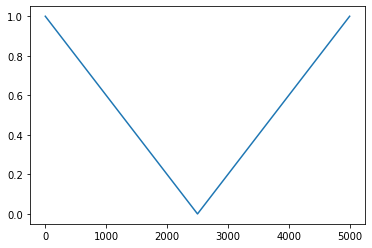

In [30]:
x = np.linspace(start=-1, stop=1, num=5000)
y=np.abs(x)

plt.plot(y)

In [33]:
net.fit(x,y, epochs=100, batch_size=100)

Train on 5000 samples
Epoch 1/100
5000/5000 [==============================] - 1s 119us/sample - loss: 0.3095
Epoch 2/100
5000/5000 [==============================] - 0s 39us/sample - loss: 0.3075
Epoch 3/100
5000/5000 [==============================] - 0s 41us/sample - loss: 0.3053
Epoch 4/100
5000/5000 [==============================] - 0s 39us/sample - loss: 0.3028
Epoch 5/100
5000/5000 [==============================] - 0s 40us/sample - loss: 0.3001
Epoch 6/100
5000/5000 [==============================] - 0s 43us/sample - loss: 0.2972
Epoch 7/100
5000/5000 [==============================] - 0s 39us/sample - loss: 0.2939
Epoch 8/100
5000/5000 [==============================] - 0s 40us/sample - loss: 0.2903
Epoch 9/100
5000/5000 [==============================] - 0s 40us/sample - loss: 0.2864
Epoch 10/100
5000/5000 [==============================] - 0s 40us/sample - loss: 0.2822
Epoch 11/100
5000/5000 [==============================] - 0s 43us/sample - loss: 0.2776
Epoch 12/100
5000/

# Dying Relu


For a fixed width, the deeper your net gets, the more likely it is for your nodes to act on the negative half of the relu activation function! This means that the relu nodes are not firing, or not doing anythhing. To learn better, as our networks get deeper, we must make them wider. Try however much you like, it is impossible for a deep relu network to learn the absolute value function! I am still learning about this, but this is really interesting. For actual understanding, please refer to [the paper](https://arxiv.org/abs/1903.06733)

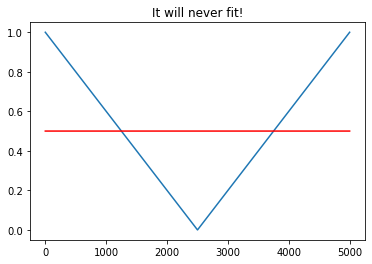

In [36]:
preds = net.predict(x)

plt.plot(y)
plt.plot(preds, 'r')
plt.title("It will never fit!")
plt.show()